# Data Prep for Multilabel Classification CNN

- The purpose of this file is to explore the distributions of the disease labels across all images. 

- The model will be a MultiLabel Classification CNN. Read more about Multilabel vs Multiclass [here!](https://www.mathworks.com/help/deeplearning/ug/multilabel-image-classification-using-deep-learning.html) 

- This code will binarize the disease labels and then prune out the No Finding images since there are disproportionate amount of them and we need to ensure that the model has enough samples to train on the disease categories rather than the No Finding labels themselves. 

- There will be multiple output CSV files: 
    - encoded_df.csv: includes all images with encoded label columns. 
    - master_prune_encode.csv: includes images without the hernia label and with 1/3 of the No Finding labels. 
    - (train|test|val)_set.csv: includes the images for the respective workflows saved as a csv file after stratified sampling with `train_test_split()`


- These csv files will be further processed in the CNN code page after deciding which target columns are suitable for the machine to process. 

- The `No Finding` column is dropped from the output csv file for the (train|test|val)_set.csv files. 

## Import Dependencies And Define Paths

In [1]:
import numpy as np 
import pandas as pd 
import os # Path joiner 
from glob import glob # Finds paths specified
import matplotlib.pyplot as plt
from itertools import chain
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split


In [2]:
# Define path for the Data_Entry_2017 CSV file 

data = os.path.join("Data_Entry_2017.csv")

## Define Functions

- `plot_distribution()` takes in the value count of labels and displays a bar graph of distribution. 

- `label_encoder()` takes in a df and outputs a new df with encoded values. A separate df is stored as a csv file. 

In [3]:
# Function to plot the distribution of disease labels
# I did not include a return statement since the function returns a duplicate plot with the return statement

def plot_distribution(label_count):
    
    # I have darkmode on my computer so this renders the plot well without cutting out the axes 
    # Comment out and disregard if not necessary 
    plt.style.use('dark_background')

    fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
    ax1.bar(np.arange(len(label_count))+0.5, label_count)
    ax1.set_xticks(np.arange(len(label_count))+0.5)
    ax1.set_xticklabels(label_count.index, rotation = 90)
    

In [4]:
# Function to Encode the Disease Labels from Original df. 

def label_encoder(raw_df, csv_path):
    # Copy the Df into two separate dataframes, one for saving as csv and one for output
    copy_df = raw_df.copy()

    # Instantiate a MultiLabelBinarizer instance and encode the Finding Labels column store results in separate columns. 
    mlb = MultiLabelBinarizer()
    new_df = pd.DataFrame(mlb.fit_transform(copy_df["Finding Labels"].str.split("|", expand = False)),columns=mlb.classes_)

    # Export CSV df 
    encoded_csv_df = pd.concat([copy_df, new_df], axis= 1)

    # Export to csv 
    encoded_csv_df.to_csv(csv_path)

    return encoded_csv_df


## Clean the Data_Entry_2017 File 

- Pair the images in the `Image Index` column with their respective paths. 

- Store the paths in a new column of the dataframe called `path`. 

- Use `map()` to match the correct images to the path.


In [5]:
# Import the Data_Entry_2017.csv file 

all_images_df = pd.read_csv(data)
all_images_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [6]:
# Count the number of total images needed from the data entry file's image index column. 

total_images =  len(all_images_df["Image Index"])

# Get the paths for the images stored in the image files and store them as a dictionary
# Make the keys the image file names using os.path.basename() so it's paired. 
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join("images*", "*", "*.png"))}

# Print results 
print(f"Images found: {len(all_image_paths)} / Total Images: {total_images}")


Images found: 112120 / Total Images: 112120


In [7]:
# Make a new column to store the paths
# Get the values = paths stored in the all_image_paths dictionary by using Image Index column as the key! 
# Check the new column to make sure the index and the paths match. Use Sample to randomly sample across the df. 

all_images_df["path"] = all_images_df["Image Index"].map(all_image_paths.get)
all_images_df.sample(10)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
15385,00004007_025.png,Edema,25,4007,33,F,AP,2500,2048,0.168,0.168,NaN,images_003\images\00004007_025.png
27146,00007065_003.png,No Finding,3,7065,47,M,PA,2500,2048,0.168,0.168,NaN,images_004\images\00007065_003.png
25003,00006585_011.png,Infiltration|Pneumothorax,11,6585,16,F,AP,2500,2048,0.171,0.171,NaN,images_004\images\00006585_011.png
81690,00020089_000.png,Infiltration,0,20089,55,M,PA,2992,2991,0.143,0.143,NaN,images_009\images\00020089_000.png
13036,00003393_060.png,Atelectasis|Infiltration,60,3393,58,M,AP,2500,2048,0.171,0.171,NaN,images_002\images\00003393_060.png
37435,00009867_013.png,No Finding,13,9867,70,M,AP,2500,2048,0.168,0.168,NaN,images_005\images\00009867_013.png
77718,00019097_004.png,Emphysema|Nodule,4,19097,64,M,PA,2992,2991,0.143,0.143,NaN,images_009\images\00019097_004.png
49930,00012640_024.png,No Finding,24,12640,69,F,PA,2526,2991,0.143,0.143,NaN,images_006\images\00012640_024.png
41477,00010722_007.png,No Finding,7,10722,49,M,PA,2992,2991,0.143,0.143,NaN,images_005\images\00010722_007.png
11628,00003041_000.png,No Finding,0,3041,61,F,PA,2500,2048,0.171,0.171,NaN,images_002\images\00003041_000.png


In [8]:
# Check Dtypes to see if transformations need to be made. 
all_images_df.dtypes

Image Index                     object
Finding Labels                  object
Follow-up #                      int64
Patient ID                       int64
Patient Age                      int64
Patient Gender                  object
View Position                   object
OriginalImage[Width              int64
Height]                          int64
OriginalImagePixelSpacing[x    float64
y]                             float64
Unnamed: 11                    float64
path                            object
dtype: object

In [9]:
# Drop Unnecessary Columns 

all_images_df.drop(columns = ['Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11'], axis = 1, inplace = True)

all_images_df.head()

,Image Index,Finding Labels,path
0,00000001_000.png,Cardiomegaly,images_001\images\00000001_000.png
1,00000001_001.png,Cardiomegaly|Emphysema,images_001\images\00000001_001.png
2,00000001_002.png,Cardiomegaly|Effusion,images_001\images\00000001_002.png
3,00000002_000.png,No Finding,images_001\images\00000002_000.png
4,00000003_000.png,Hernia,images_001\images\00000003_000.png


From here, Finding Labels is useful for sorting purposes so we will keep it for the time being. We will drop No finding eventually once we sample the data to be the size we want and prune out the values for the No Finding labels. 

### Encode The Disease Labels 

- The purpose of the encoding is to see the distributions of the labels across multiple images since this will be a multilabel classification problem. 

In [10]:
# Loop through each word within the strings(values) of the column and extract the single disease diagnoses.
# Single diseases don't have '|' in their values.
# First loop through values in the column and split the comorbidities as individual string values
# Iterate over each individual value within the results and list the unique values.
# transform the comorbidities from object to list first 
# Include * in the it.chain() function first otherwise it won't loop over the individual lists within the list of values 

all_diseases = list(chain(*all_images_df["Finding Labels"].str.split("|").tolist()))
labels = np.unique(all_diseases).tolist()
labels

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [11]:
# Encode the disease labels 
csv = 'encoded_df.csv'
encoded_df = label_encoder(all_images_df, csv)
encoded_df

,Image Index,Finding Labels,path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,images_001\images\00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,images_001\images\00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,images_001\images\00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,images_001\images\00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,Hernia,images_001\images\00000003_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,images_012\images\00030801_001.png,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
112116,00030802_000.png,No Finding,images_012\images\00030802_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
112117,00030803_000.png,No Finding,images_012\images\00030803_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
112118,00030804_000.png,No Finding,images_012\images\00030804_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Drop 'Hernia' because it only has 227 images. 

In [12]:
# Create a function to drop based on labels within the encoded columns. 
# I did not want to loop through and iterchains the finding labels column. 
# The input is a df with a label to drop
# Output is a clean df with a new count of the encoded columns. 

def label_dropper(df, label_to_drop):
    ndf1 = df.copy()
    c_df = ndf1.drop(ndf1[ndf1[label_to_drop] == 1].index)
    return c_df

In [13]:
# Drop Images with the Hernia Label due to insufficient counts 

processed_df = label_dropper(encoded_df, label_to_drop="Hernia")
processed_df.drop(columns = ["Hernia"], axis = 1, inplace= True)
processed_df.shape

(111893, 17)

- Extract and sample 25000 images from the No Finding since there are too many samples within that column that doesn't give much information towards disease categorization. That's about 1/3 of the samples. 

In [14]:
# Sample the No Findings to be 30,000 images 
negative_df = processed_df[processed_df['No Finding'] == 1].sample(n = 25000, replace = False, random_state= 20)
negative_df.shape

(25000, 17)

In [15]:
# Drop the original No Finding Values from the processed df and merge with the negative df. 
new_df = label_dropper(processed_df, label_to_drop="No Finding")
clean_df = pd.concat([new_df, negative_df], axis=0, join='outer').sort_index().reset_index()
clean_df.rename(columns = {'index':'og_idx'}, inplace = True)
clean_df

,og_idx,Image Index,Finding Labels,path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,0,00000001_000.png,Cardiomegaly,images_001\images\00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,00000001_001.png,Cardiomegaly|Emphysema,images_001\images\00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,2,00000001_002.png,Cardiomegaly|Effusion,images_001\images\00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,12,00000004_000.png,Mass|Nodule,images_001\images\00000004_000.png,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,13,00000005_000.png,No Finding,images_001\images\00000005_000.png,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76527,112113,00030800_000.png,No Finding,images_012\images\00030800_000.png,0,0,0,0,0,0,0,0,0,1,0,0,0,0
76528,112114,00030801_000.png,No Finding,images_012\images\00030801_000.png,0,0,0,0,0,0,0,0,0,1,0,0,0,0
76529,112115,00030801_001.png,Mass|Pneumonia,images_012\images\00030801_001.png,0,0,0,0,0,0,0,0,1,0,0,0,1,0
76530,112117,00030803_000.png,No Finding,images_012\images\00030803_000.png,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [16]:
# Svae to CSV 
clean_df.to_csv('master_prune_encode.csv')

Cardiomegaly           2769
Consolidation          4663
Edema                  2300
Effusion              13296
Emphysema              2512
Fibrosis               1678
Infiltration          19861
Mass                   5757
No Finding            25000
Nodule                 6321
Pleural_Thickening     3377
Pneumonia              1428
Pneumothorax           5293
dtype: int64


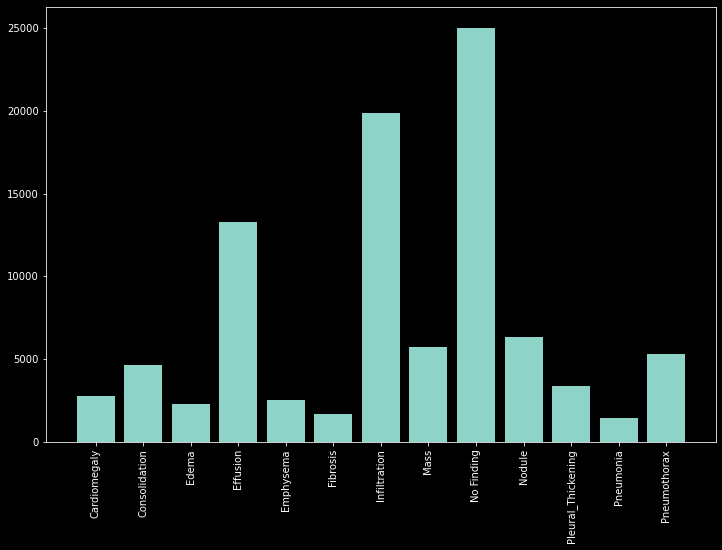

In [17]:
# See the new labels and their distribution in the clean_df
n_labels = clean_df.columns.to_list()[5:]
n_counts = pd.Series({l : clean_df[l].sum() for l in n_labels})
print(n_counts)
plot_distribution(n_counts)

The Distribution of the above graph must be maintained throughout the split sets. Confirm with graphs below. 

No Finding is good for Sorting but an extra feature means more computational power required. Thus we need to delete it :( but after the train test split is done. 

At this point, we have 80K images that are slated to be tested. We are going to train with 50K images:
- 30K Training 
- 10K Testing
- 10K Validation 

## Instantiate a `Train_Test_Split` to Sample Desired Data Size 

- Split between Training and validation set and split validation set into validation and test set. 

- stratify the finding labels column by only letting it see the first four letters of the labels. 

- This ensures that we are only looking at the first finding and the minimum letters for the first finding is 4 as it could be either Edema or Mass. Otherwise, train_test_split will throw an error as it considers each individual set of strings as its own unique identifier. 

- Minimum sample for train_test_split stratify should be greater than 1. 

- SKMultiLearn has an `iterative_train_test_split()` that is designed for multilabel stratification but I have not been able to use it without errors so this is the old fashioned way. 

In [18]:
# Instantiate a Train_Test_Split and split the data into train and test sets. 
# Stratify the sampling to ensure distributions are maintained. 
# Train_size and Test_size must be defined using integers to ensure the data size is correct. 

train_df, val_test_df = train_test_split(clean_df, 
    stratify = clean_df["Finding Labels"].map((lambda x: x[:4])) , 
        random_state = 100, train_size = 30000, test_size = 20000)

In [19]:
# Instantiate a Train_Test_Split and split the data into test and validation sets
# Stratify the sampling to ensure distributions are maintained. 
# Train_size and Test_size must be defined using integers to ensure the data size is correct. 

val_df, test_df = train_test_split(val_test_df, 
    stratify = val_test_df["Finding Labels"].map((lambda x: x[:4])), 
        random_state = 100, train_size = 0.5)

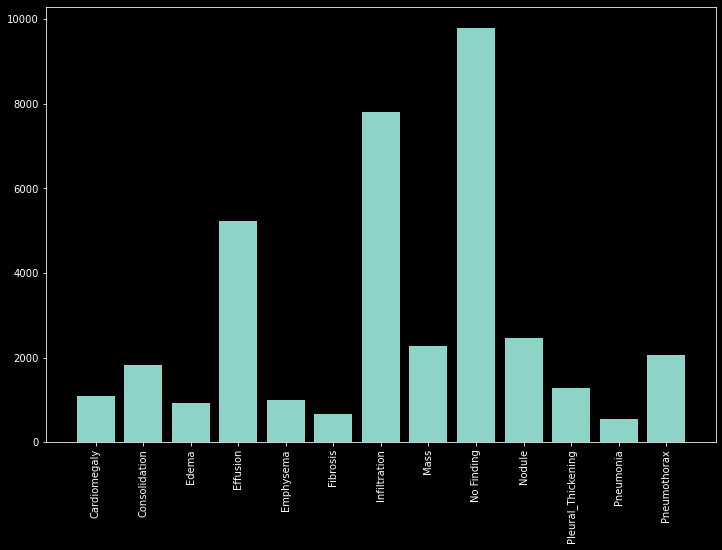

In [20]:
# Check to see the distribution of the disease labels in the sample data

train_dis = pd.Series({l : train_df[l].sum() for l in n_labels})
plot_distribution(train_dis)

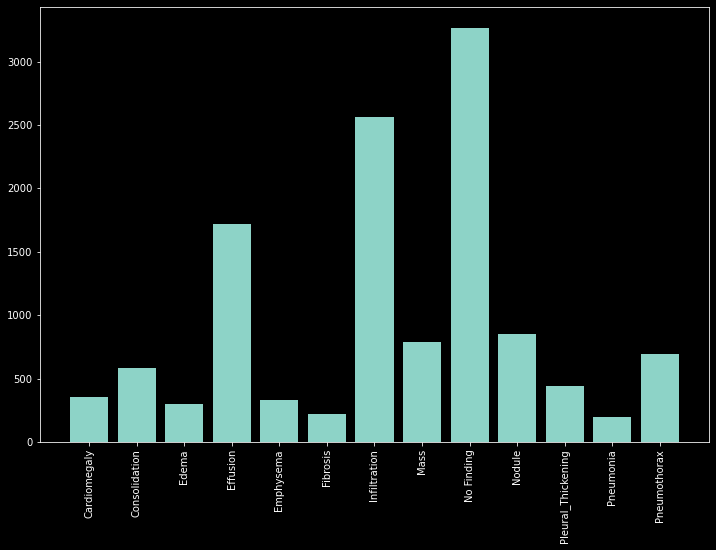

In [21]:
# Check to see the distribution of the disease labels in the sample data

val_dis = pd.Series({l : val_df[l].sum() for l in n_labels})
plot_distribution(val_dis)

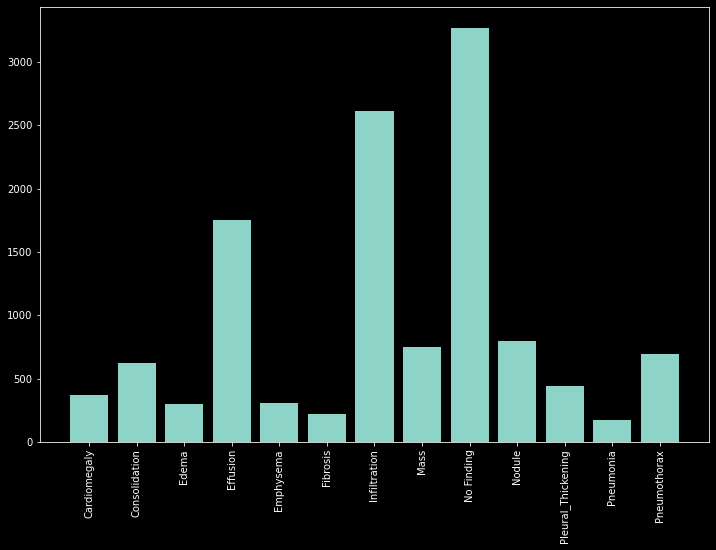

In [22]:
# Check to see the distribution of the disease labels in the sample data

test_dis = pd.Series({l : test_df[l].sum() for l in n_labels})
plot_distribution(test_dis)

## Save the sets as CSV's

In [23]:
# Drop the No Finding column in all sets

sets = [train_df, test_df, val_df]

for set in sets: 
    set.drop(columns = ['No Finding'], axis = 1, inplace= True)

train_df.head(1)

,og_idx,Image Index,Finding Labels,path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
29453,44578,00011460_052.png,No Finding,images_005\images\00011460_052.png,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
# Save as CSV

train_df.to_csv('train_set.csv')
val_df.to_csv('val_set.csv')
test_df.to_csv('test_set.csv')